# Homework 11

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import utils as utils
from fractions import Fraction

from func import Func
from IPython.display import display, HTML

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

---
## Example 14.3


<img src="figures/homework-11/example-14.3.png" width="600" />














<img src="figures/homework-11/figure-14.10.png" width="600" />






















---
## Exercise 14.2

<img src="figures/homework-11/exercise-14.2.png" width="600" />


In [4]:
class NaiveRandomSearch:
    def __init__(self, f):
        self._f = f
    
    def check_feasible_set(self):
        feasible_set = [
            sy.Interval(-3, sy.oo),
            sy.Interval(-sy.oo, 3)
        ]

        def fetch_val(val, min_val=-1000, max_val=1000):
            if val == sy.oo:
                return max_val
            if val == -sy.oo:
                return min_val
            return val

        low = np.zeros(len(feasible_set))
        high = np.zeros(len(feasible_set))
        for index, interval in enumerate(feasible_set):
            if isinstance(interval, sy.EmptySet):
                raise ValueError('Interval at {0} is invalid.'.format(index))
            low[index] = fetch_val(interval.left)
            high[index] = fetch_val(interval.right)

        low, high  
    
    def pick_random_point(self, x_k, alpha):
        # TODO: Ensure that these points are within the feasible set
        low  = x_k - alpha
        high = x_k + alpha
        return np.random.uniform(low, high)
    
    def f_at(self, point):
        f_val = self._f.func_at(point)
        return f_val[0]
    
    def run(self, initial_point, alpha, max_iterations=20):
        x_k = np.array(initial_point)
        has_converged = False
        
        for k in range(1, max_iterations+1):
            z_k = self.pick_random_point(x_k, alpha)
            
            f_at_z_k = self.f_at(z_k)
            f_at_x_k = self.f_at(x_k)
            
            if self.f_at(z_k) < self.f_at(x_k):
                x_kp1 = z_k
            else:
                x_kp1 = x_k
            
            # TODO: Check for stopping criterion
            
            print('k={0:2}: x[k]={1} f(x[k])={2:.4f}  z(k)={3}, f(z[k])={4:.4f} x[k+1]={5}'.format( 
                k, 
                utils.format_vector(x_k),
                float(f_at_x_k),
                utils.format_vector(z_k),
                float(f_at_z_k),
                utils.format_vector(x_kp1)
                )
            )
            
            x_k = x_kp1
        return x_k


In [5]:
def create_f142():
    x, y = sy.symbols('x, y')
    term1 = 3*(1-x)**2 * sy.exp(-x**2 - (y+1)**2)
    term2 = 10*(x/5 - x**3 - y**5) * sy.exp(-x**2 - y**2)
    term3 = sy.exp(-(x+1)**2 - y**2) / 3
    f = term1 - term2 - term3
    return Func(f, (x,y))

f142 = create_f142()
f142

⎡                                                                        2    
⎢                2          2                               2    2    - y  - (
⎢          2  - x  - (y + 1)    ⎛      3             5⎞  - x  - y    ℯ        
⎢3⋅(-x + 1) ⋅ℯ                - ⎝- 10⋅x  + 2⋅x - 10⋅y ⎠⋅ℯ          - ─────────
⎣                                                                           3 

      2⎤
x + 1) ⎥
       ⎥
───────⎥
       ⎦

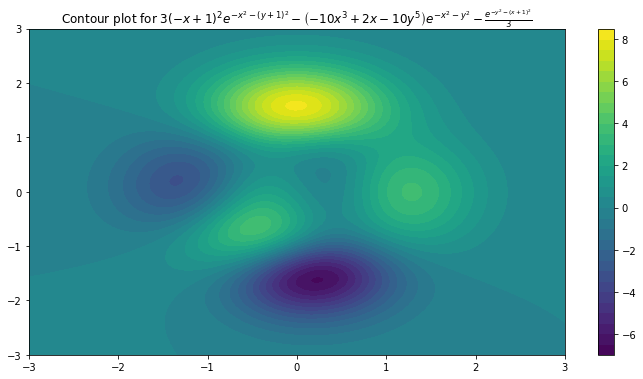

In [7]:
fig, ax = f142.plot_contour(x_limit=(-3, 3), levels=30)

In [8]:
nrs = NaiveRandomSearch(f142)

In [275]:
nrs.run(initial_point=(0, 1.5), alpha=2, max_iterations=20)

k= 1: x[k]=['0.0000', '1.5000'] f(x[k])=7.9966  z(k)=['-0.4282', '2.7244'], f(z[k])=0.7467 x[k+1]=['-0.4282', '2.7244']
k= 2: x[k]=['-0.4282', '2.7244'] f(x[k])=0.7467  z(k)=['-2.2272', '1.9915'], f(z[k])=0.0261 x[k+1]=['-2.2272', '1.9915']
k= 3: x[k]=['-2.2272', '1.9915'] f(x[k])=0.0261  z(k)=['-3.3437', '1.6101'], f(z[k])=-0.0004 x[k+1]=['-3.3437', '1.6101']
k= 4: x[k]=['-3.3437', '1.6101'] f(x[k])=-0.0004  z(k)=['-5.1042', '2.1478'], f(z[k])=-0.0000 x[k+1]=['-3.3437', '1.6101']
k= 5: x[k]=['-3.3437', '1.6101'] f(x[k])=-0.0004  z(k)=['-4.1946', '2.1953'], f(z[k])=-0.0000 x[k+1]=['-3.3437', '1.6101']
k= 6: x[k]=['-3.3437', '1.6101'] f(x[k])=-0.0004  z(k)=['-3.2960', '2.8308'], f(z[k])=0.0000 x[k+1]=['-3.3437', '1.6101']
k= 7: x[k]=['-3.3437', '1.6101'] f(x[k])=-0.0004  z(k)=['-2.9136', '1.9165'], f(z[k])=-0.0001 x[k+1]=['-3.3437', '1.6101']
k= 8: x[k]=['-3.3437', '1.6101'] f(x[k])=-0.0004  z(k)=['-2.2697', '0.5541'], f(z[k])=-0.5088 x[k+1]=['-2.2697', '0.5541']
k= 9: x[k]=['-2.2697', 

array([-212448/414463, -1906060/935163])

---
## Exercise 14.3

<img src="figures/homework-11/exercise-14.3.png" width="600" />

